# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate
from tqdm import tqdm_notebook

In [114]:
data = pd.io.stata.read_stata('/mnt/c/users/我的电脑/desktop/springboard/EDA_racial_discrimination/data/us_job_market_discrimination.dta')

In [115]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [116]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<p><b>Question 1:</p>
<p>1. What test is appropriate for this problem? Does CLT apply?</b><br><br>
1. The appropriate test is a Z-test for two sample means. The CLT does apply as there is more than 30 data points and each data point is independent.</p>
<p><b>Question 2:</p>
<p>2. What are the null and alternate hypotheses?</b><br><br>
    H<sub>0</sub>: The mean for the call back variable does not change between racial groups.<br>
    H<sub>a</sub>: The mean does change between racial groups.</p>

In [117]:
w = data[data.race=='w']
b = data[data.race=='b']

<p><b>Question 3:</p>
<p> 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.</b><br><br>
</p>

<p><b>Frequentist Approach</b></p>

In [121]:
w_mean=np.mean(w['call'])
w_stdm=np.sqrt(w_mean*(1-w_mean))/np.sqrt(w['call'].size)
b_mean=np.mean(b['call'])
b_stdm=np.sqrt(b_mean*(1-b_mean))/np.sqrt(b['call'].size)
stdm=np.sqrt(w_stdm**2+b_stdm**2)

def dist(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

p=integrate.quad(dist,(w_mean-b_mean)/stdm,10)[0]
margin_of_error=1.959963984540*stdm
confidence_interval=[-margin_of_error,margin_of_error]

print(' Margin of Error: ',margin_of_error,'\n\r','Confidence Interval: ',\
     confidence_interval,'\n\r','p value: ',p)

 Margin of Error:  0.015255126027012317 
 Confidence Interval:  [-0.015255126027012317, 0.015255126027012317] 
 p value:  1.93128190645485e-05


<p><b>Bootstrap Approach</b></p>

In [120]:
trials=10**4
mean_differences=np.empty(trials)
for trial in tqdm_notebook(range(trials)):
    data_1=data['call'].sample(w['call'].size,replace=True)
    data_2=data['call'].sample(b['call'].size,replace=True)
    mean_differences[trial]=np.mean(data_1)-np.mean(data_2)
mean_difference=np.mean(w['call'])-np.mean(b['call'])

p=np.sum(mean_differences>=mean_difference)/trials
confidence_interval=list(np.percentile(mean_differences,[2.5,97.5]))
margin_of_error=(confidence_interval[1]-confidence_interval[0])/2

print(' Margin of Error: ',margin_of_error,'\n\r','Confidence Interval: ',\
     confidence_interval,'\n\r','p value: ',p)


 Margin of Error:  0.015195071697235107 
 Confidence Interval:  [-0.015195071697235107, 0.015195071697235107] 
 p value:  0.0


<h1>Question 4:</h1>
<p>4. Write a story describing the statistical significance in the context or the original problem.</p>

<p><b>Calls Backs Calling Back to an Another Era</b><br>
In a recent study resumes with a name traditionally associated with black community recieved 50% less call backs that resumes with a tradtionally white name. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical resumes to black-sounding or white-sounding names and observing the impact on requests for interviews from employers. The resumes also included varying levels of experience, education, and application criteria. In addition the researchers applied to different positions from managerial to entry level positions. The combined data from these groups showed a statistcally signifigant increase in the call back rate for resumes using a traditionally white name.</p>

<h1>Question 5:</h1>
<p>5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?</p>
<p>No it does not. The other charateristics of the data were not tested. It is also not possible to compare the importance of categorical data with emperical data. I would ammend my analysis by applying a n-dimensional linear model and see the most signifigant changes by applying the lowest and higest values.</p>

<h1>Appendix:</h1>

(array([ 54., 347., 726., 800., 258., 243.,   7.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

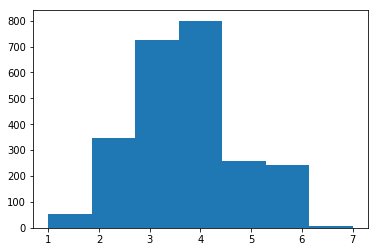

In [26]:
plt.hist(w['ofjobs'],bins=7)

(array([ 56., 357., 703., 811., 275., 221.,  12.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

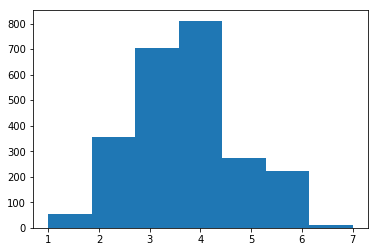

In [29]:
plt.hist(b['ofjobs'],bins=7)

In [67]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [124]:
a=np.mean(w['call'])

In [125]:
b=np.mean(b['call'])

In [126]:
(a-b)/b

0.4968153